In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def filter_events(event_type, author_name=None):
    df = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8', low_memory=False)
    df = df[['start_date', 'event_type', 'item_authors']].dropna()
    df['start_date'] = df['start_date'].str.replace('\D+', '', regex=True).str[:4].astype(int)
    # I chose to filter with <= 1941 because the bookstore officially closed in 1941. After this they ocassionally sold or lend books but the bookstore itself didn't exist anymore
    df =  df[(df['start_date'].astype(str).str.match('^19[1-4]\d$')) & (df['start_date'] <= 1941)]
    df = df.loc[df['event_type'] == event_type]
    # in case it should be filtered by author
    if author_name is not None:
        df = df[df['item_authors'].astype(str).str.match(author_name)]
    df['start_date'] = pd.to_datetime(df['start_date'], format='%Y')
    count = df['start_date'].dt.year.value_counts()
    count = count.sort_index()
    return count

b_count = filter_events('Borrow')
p_count = filter_events('Purchase')

In [ ]:
plt.figure(figsize=(7,4))

plt.plot(b_count.index, b_count.values, label='Borrow History (1919-1941)', color='dodgerblue')
plt.plot(p_count.index, p_count.values, label='Purchase History (1920-1941)', color='darkviolet')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Borrow and Purchase history')
plt.legend()
plt.grid(which='major', color='silver', linewidth=0.8)
plt.grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.7)
plt.minorticks_on()
plt.show()

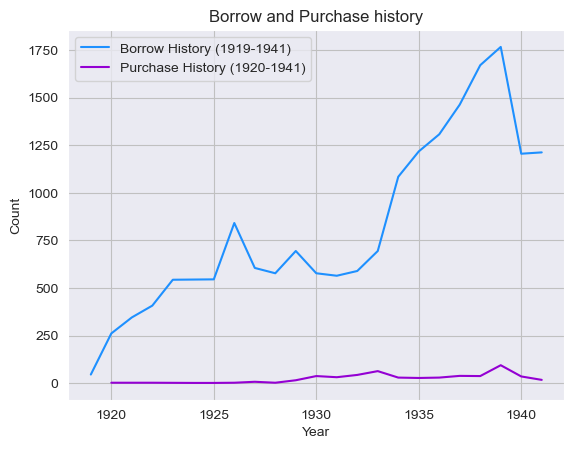

In [6]:
# Plot the borrow history
sns.lineplot(x=b_count.index, y=b_count.values, label='Borrow History (1919-1941)', color='dodgerblue')

# Plot the purchase history
sns.lineplot(x=p_count.index, y=p_count.values, label='Purchase History (1920-1941)', color='darkviolet')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Borrow and Purchase history')

# Add legend
plt.legend()

# Add grids
plt.grid(which='major', color='silver', linewidth=0.8)
plt.minorticks_on()

# Show the plot
plt.show()